<h1 align=center> Indian House Price Prediction </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score
from sklearn.feature_selection import SelectKBest,f_regression

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('./Indian_house_price.csv')
data.head()

,Price,Area,Location,City,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,...,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,Bangalore,4,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,Bangalore,2,0,0,1,1,1,...,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,Bangalore,2,0,0,1,1,1,...,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,Bangalore,3,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,Bangalore,3,0,1,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [3]:
pd.set_option('display.max_columns',45)

In [4]:
data.head()

,Price,Area,Location,City,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,3340,JP Nagar Phase 1,Bangalore,4,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
1,7888000,1045,Dasarahalli on Tumkur Road,Bangalore,2,0,0,1,1,1,1,1,1,0,0,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
2,4866000,1179,Kannur on Thanisandra Main Road,Bangalore,2,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
3,8358000,1675,Doddanekundi,Bangalore,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,6845000,1670,Kengeri,Bangalore,3,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32963 entries, 0 to 32962
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                32963 non-null  int64 
 1   Area                 32963 non-null  int64 
 2   Location             32963 non-null  object
 3   City                 32963 non-null  object
 4   No. of Bedrooms      32963 non-null  int64 
 5   Resale               32963 non-null  int64 
 6   MaintenanceStaff     32963 non-null  int64 
 7   Gymnasium            32963 non-null  int64 
 8   SwimmingPool         32963 non-null  int64 
 9   LandscapedGardens    32963 non-null  int64 
 10  JoggingTrack         32963 non-null  int64 
 11  RainWaterHarvesting  32963 non-null  int64 
 12  IndoorGames          32963 non-null  int64 
 13  ShoppingMall         32963 non-null  int64 
 14  Intercom             32963 non-null  int64 
 15  SportsFacility       32963 non-null  int64 
 16  ATM 

In [6]:
data.shape

(32963, 41)

In [7]:
data.size

1351483

In [8]:
data.isnull().sum()

Price                  0
Area                   0
Location               0
City                   0
No. of Bedrooms        0
Resale                 0
MaintenanceStaff       0
Gymnasium              0
SwimmingPool           0
LandscapedGardens      0
JoggingTrack           0
RainWaterHarvesting    0
IndoorGames            0
ShoppingMall           0
Intercom               0
SportsFacility         0
ATM                    0
ClubHouse              0
School                 0
24X7Security           0
PowerBackup            0
CarParking             0
StaffQuarter           0
Cafeteria              0
MultipurposeRoom       0
Hospital               0
WashingMachine         0
Gasconnection          0
AC                     0
Wifi                   0
Children'splayarea     0
LiftAvailable          0
BED                    0
VaastuCompliant        0
Microwave              0
GolfCourse             0
TV                     0
DiningTable            0
Sofa                   0
Wardrobe               0


In [9]:
data.duplicated().sum()

3828

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data.shape

(29135, 41)

In [12]:
data.drop(columns=["Area","Location"],inplace=True)

In [13]:
data.head()

,Price,City,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,Bangalore,4,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
1,7888000,Bangalore,2,0,0,1,1,1,1,1,1,0,0,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
2,4866000,Bangalore,2,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
3,8358000,Bangalore,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,6845000,Bangalore,3,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0


In [14]:
data.nunique()

Price                  4924
City                      6
No. of Bedrooms           9
Resale                    2
MaintenanceStaff          3
Gymnasium                 3
SwimmingPool              3
LandscapedGardens         3
JoggingTrack              3
RainWaterHarvesting       3
IndoorGames               3
ShoppingMall              3
Intercom                  3
SportsFacility            3
ATM                       3
ClubHouse                 3
School                    3
24X7Security              3
PowerBackup               3
CarParking                3
StaffQuarter              3
Cafeteria                 3
MultipurposeRoom          3
Hospital                  3
WashingMachine            3
Gasconnection             3
AC                        3
Wifi                      3
Children'splayarea        3
LiftAvailable             3
BED                       3
VaastuCompliant           3
Microwave                 3
GolfCourse                3
TV                        3
DiningTable         

In [15]:
data1 = data.copy()

In [16]:
le = LabelEncoder()

In [17]:
data1["City"] = le.fit_transform(data1["City"])

In [18]:
data1.head()

,Price,City,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,RainWaterHarvesting,IndoorGames,ShoppingMall,Intercom,SportsFacility,ATM,ClubHouse,School,24X7Security,PowerBackup,CarParking,StaffQuarter,Cafeteria,MultipurposeRoom,Hospital,WashingMachine,Gasconnection,AC,Wifi,Children'splayarea,LiftAvailable,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator
0,30000000,0,4,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
1,7888000,0,2,0,0,1,1,1,1,1,1,0,0,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0
2,4866000,0,2,0,0,1,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0
3,8358000,0,3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,6845000,0,3,0,1,1,1,1,1,1,1,0,1,1,0,1,0,1,1,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0


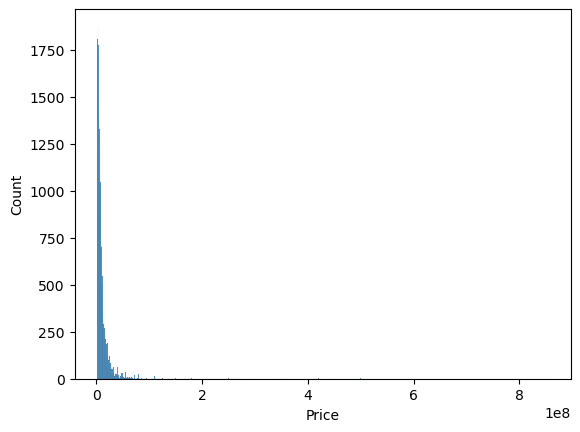

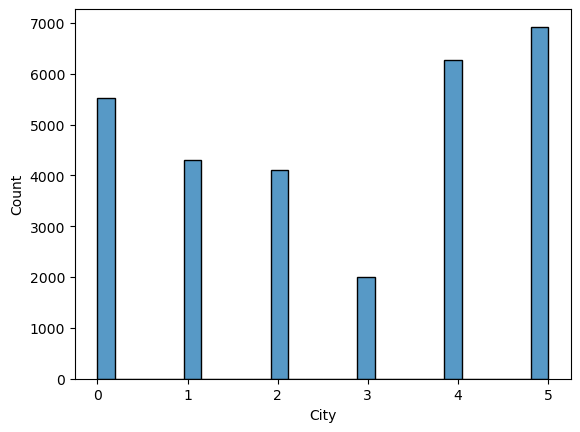

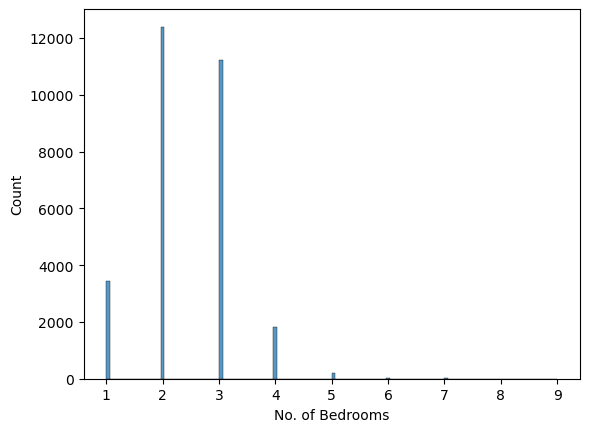

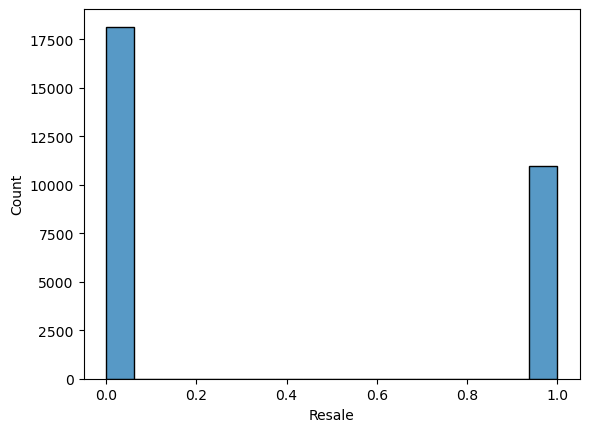

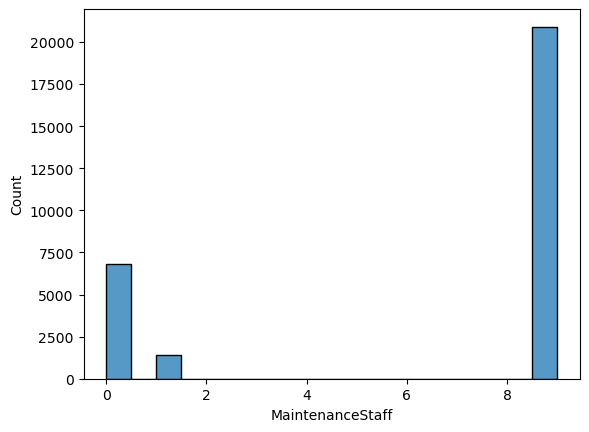

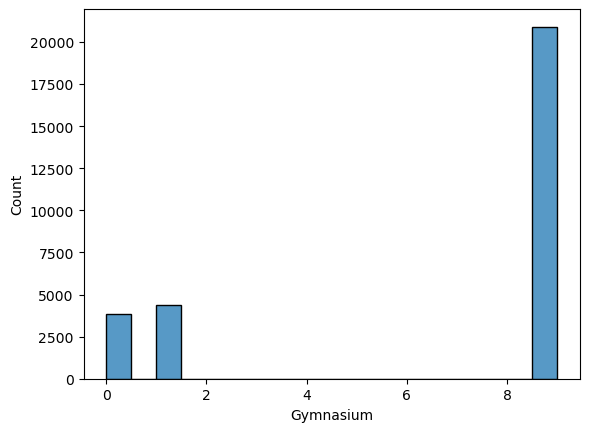

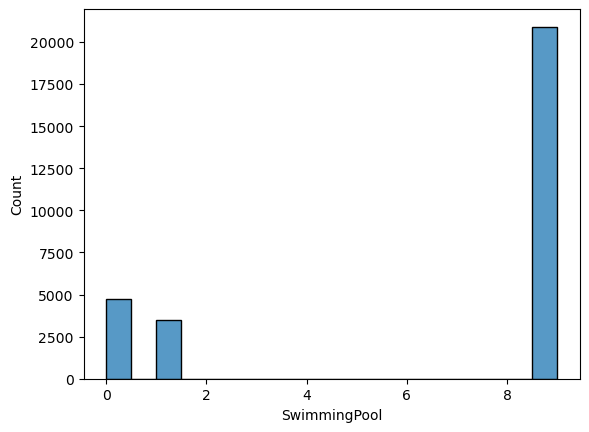

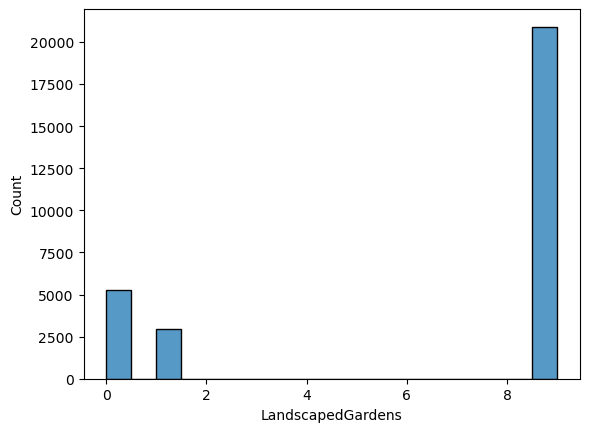

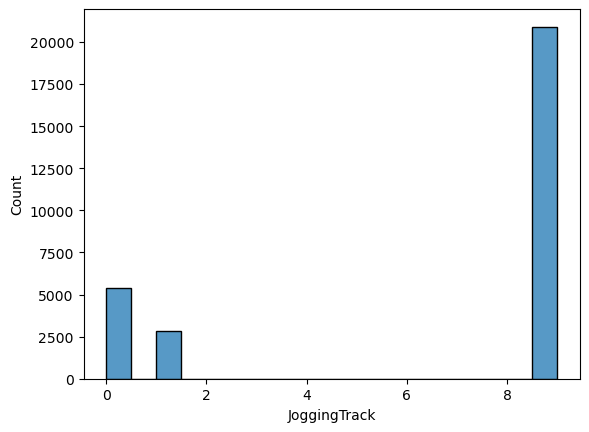

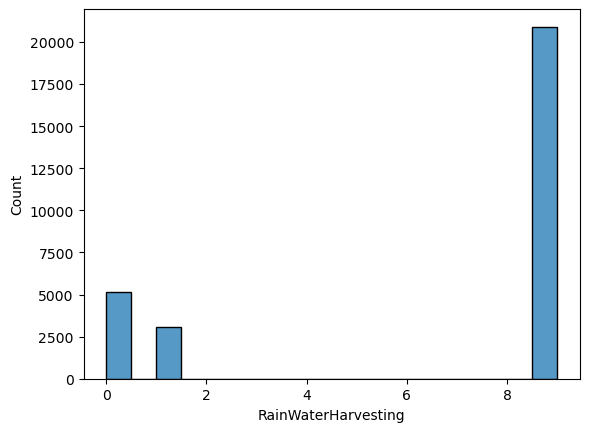

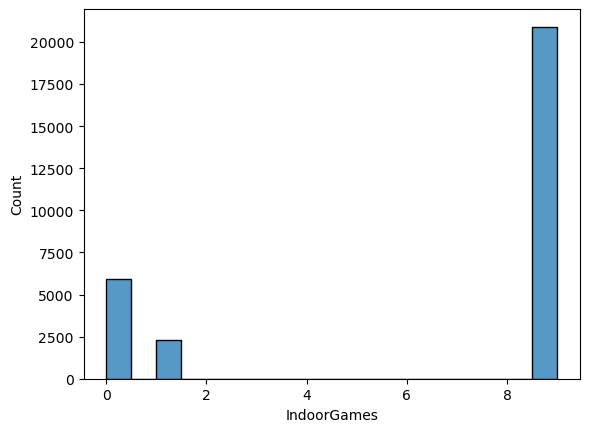

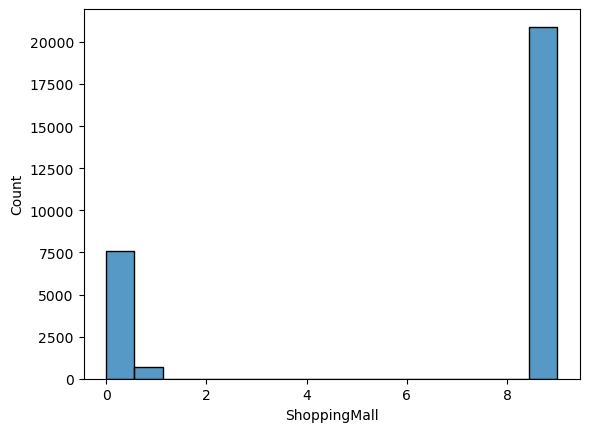

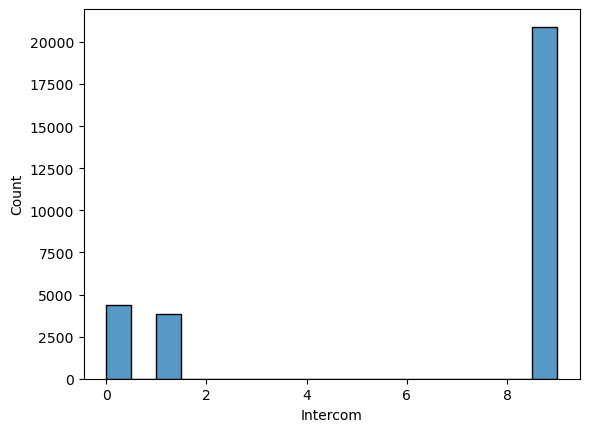

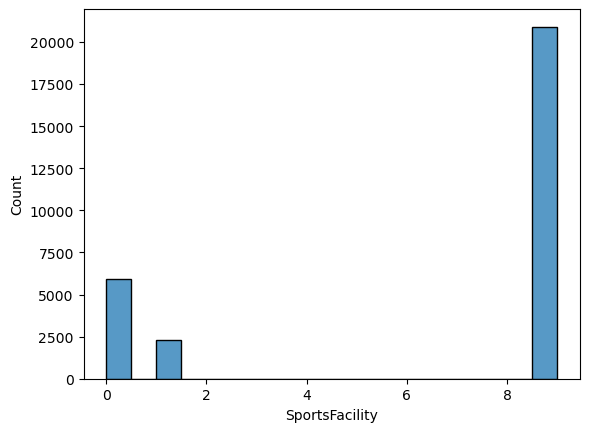

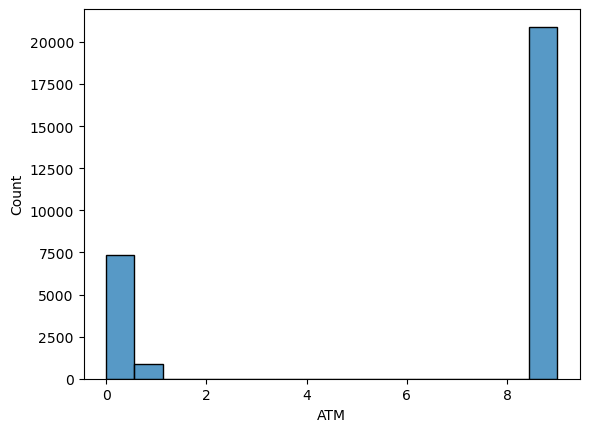

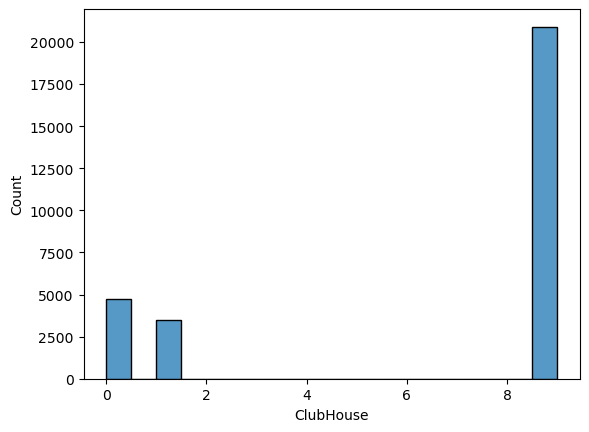

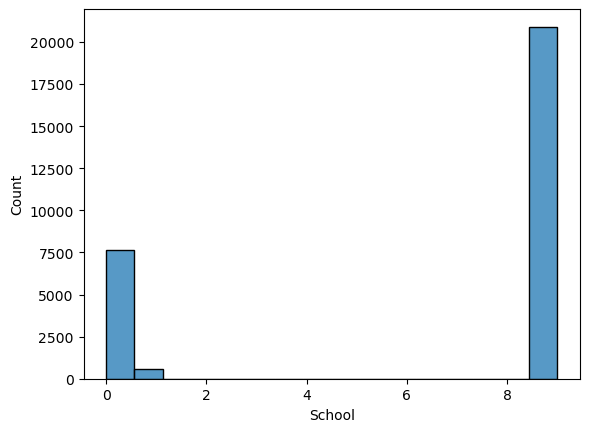

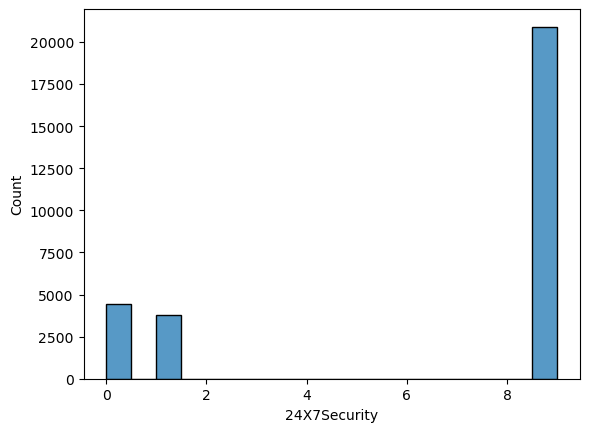

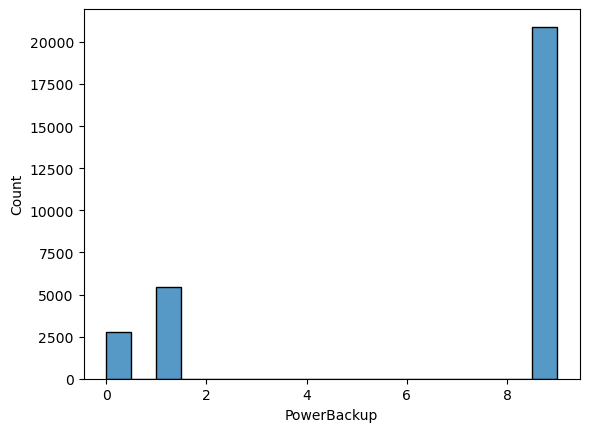

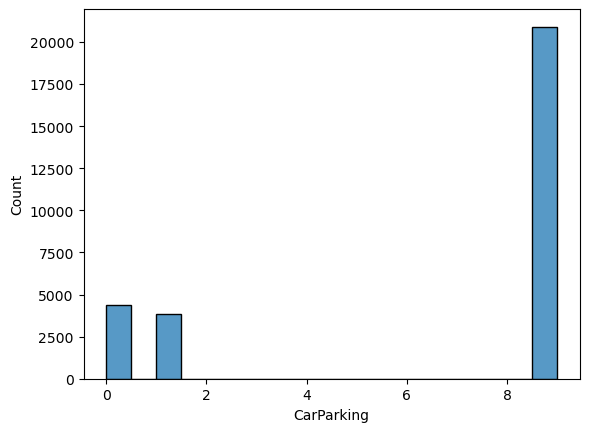

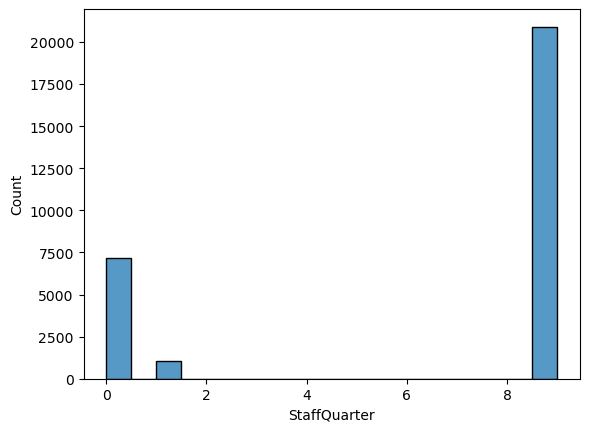

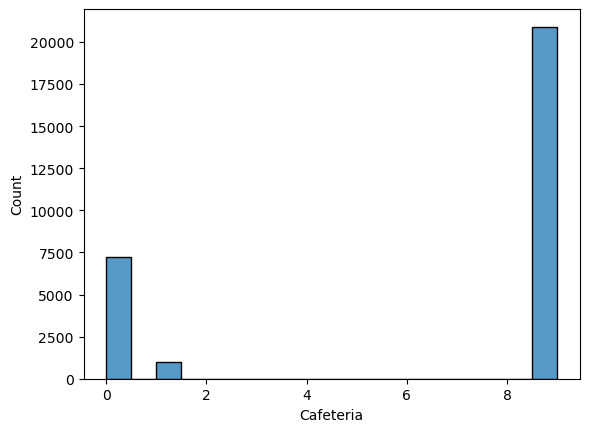

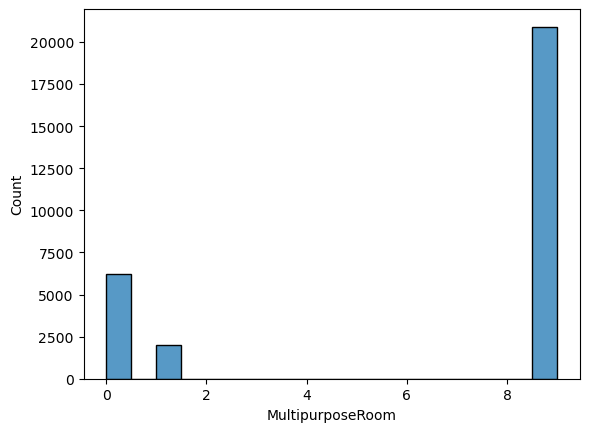

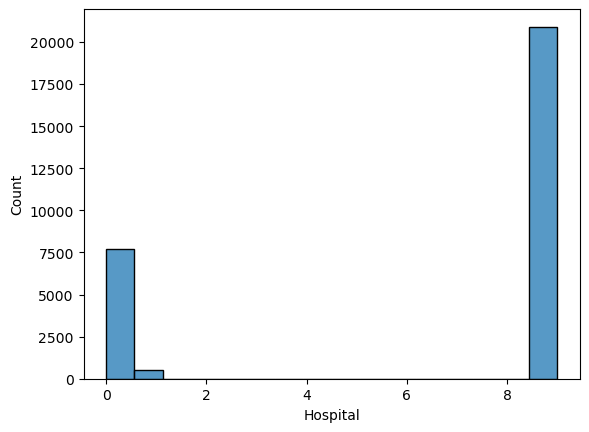

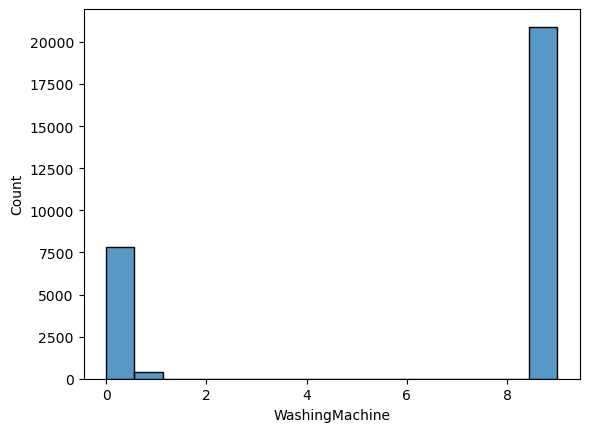

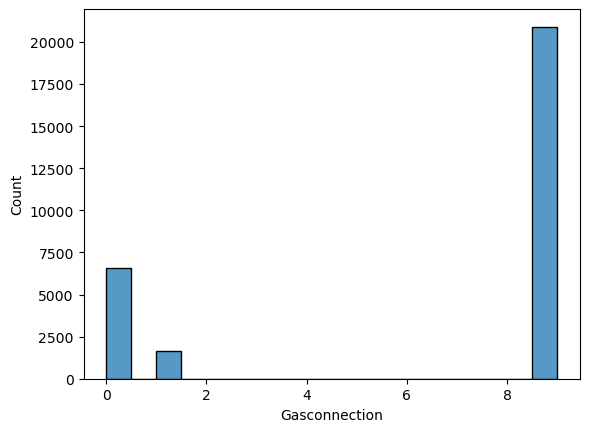

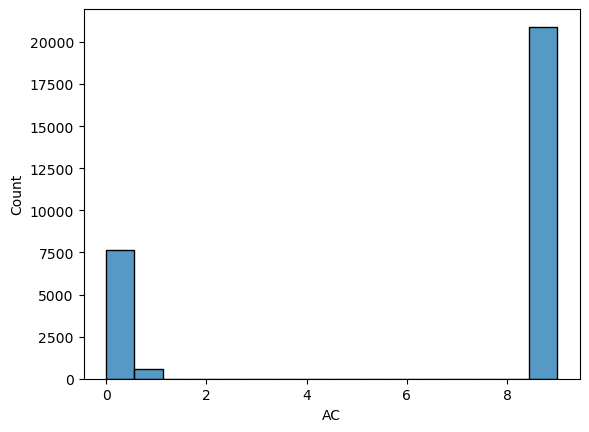

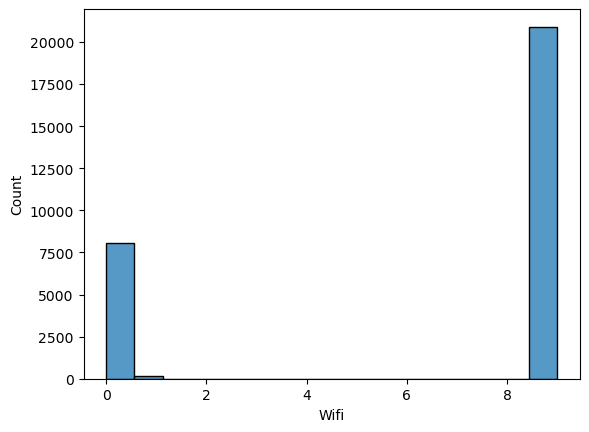

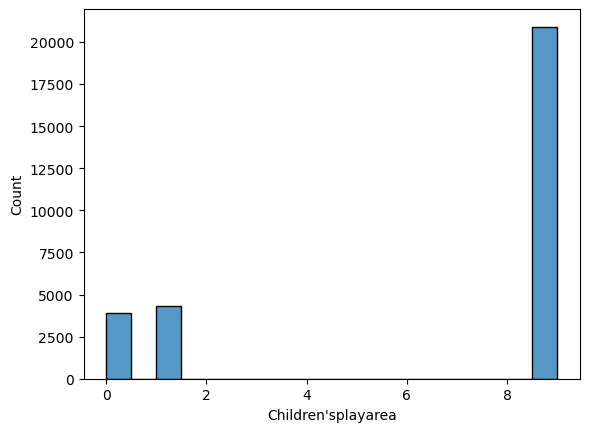

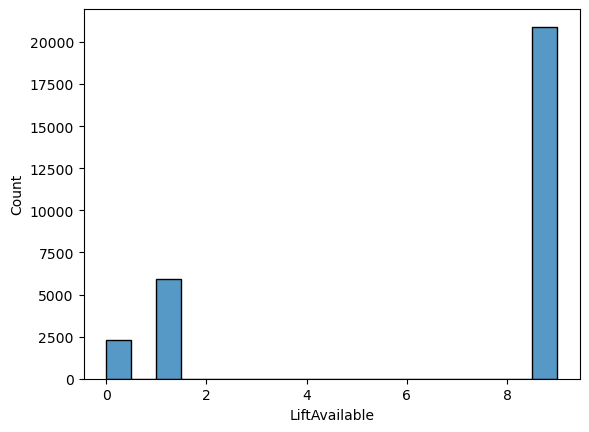

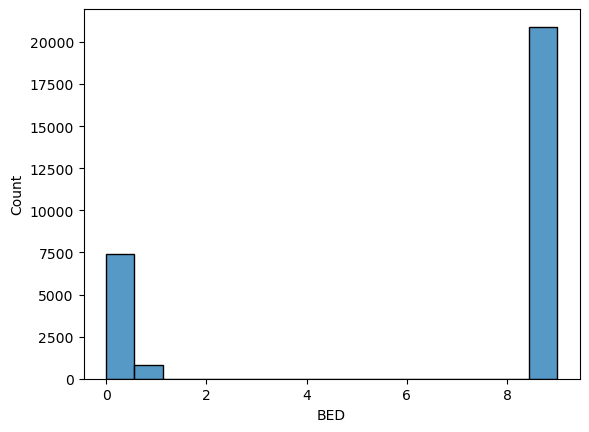

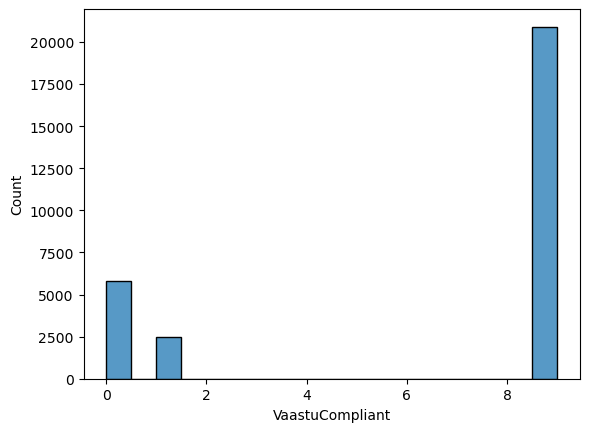

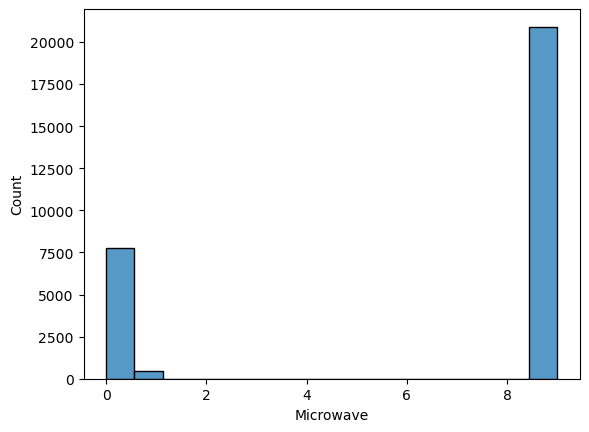

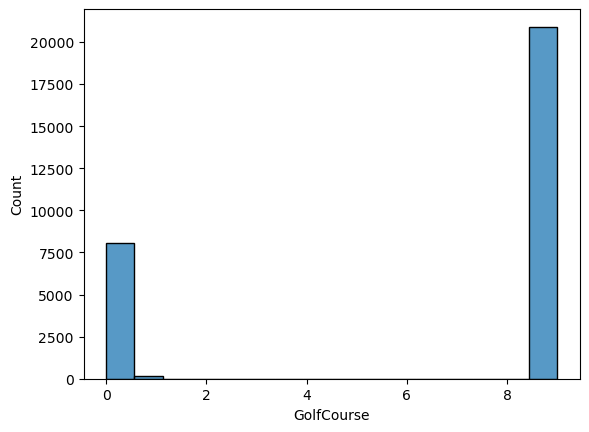

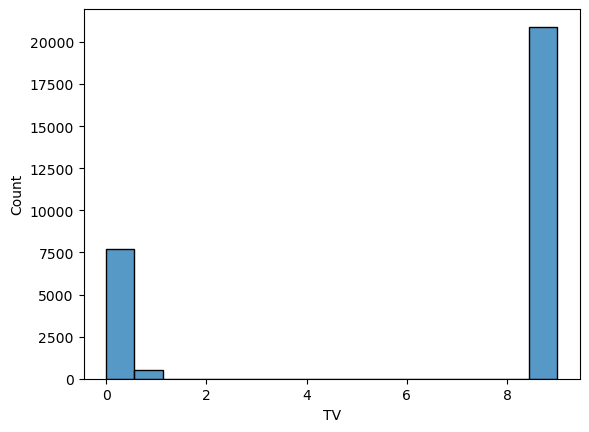

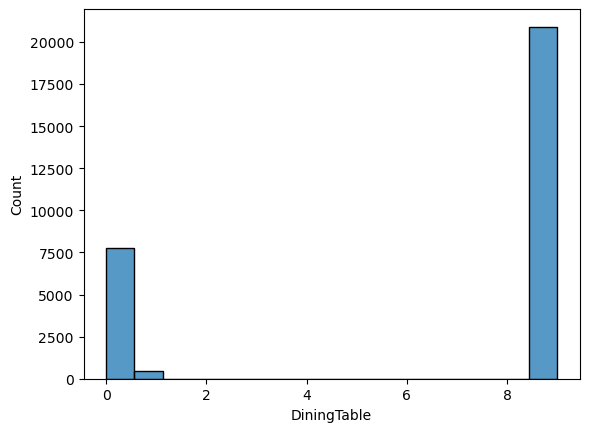

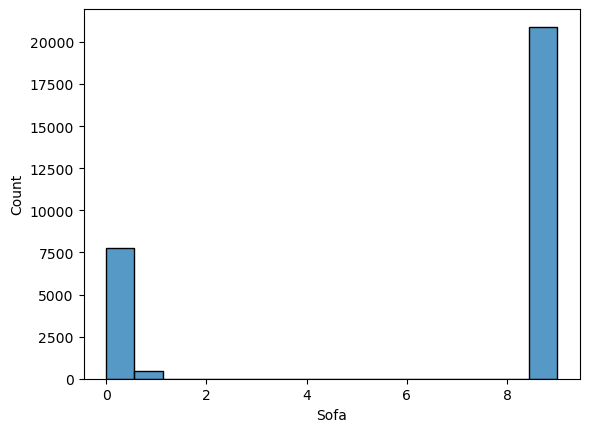

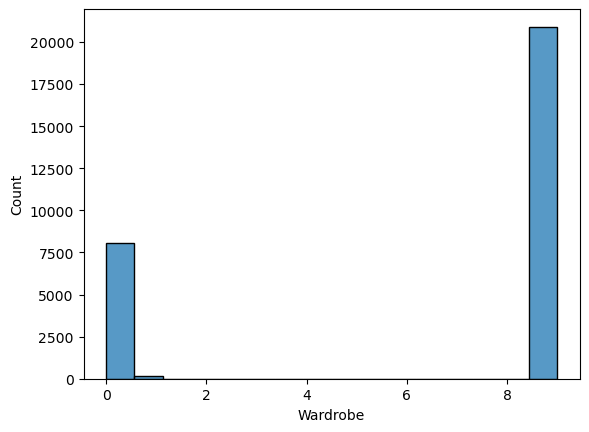

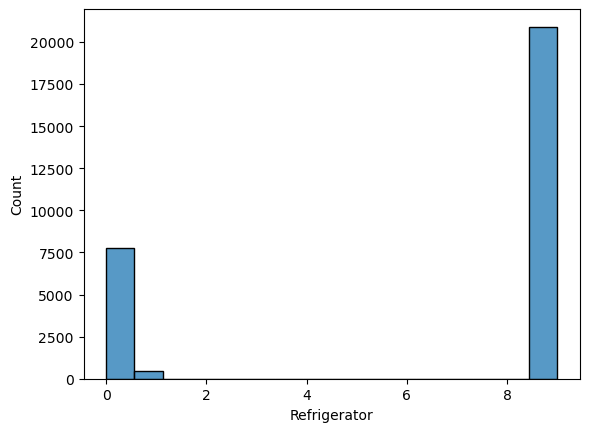

In [19]:
for i in data1.columns:
    sns.histplot(x=data1[i])
    plt.show()

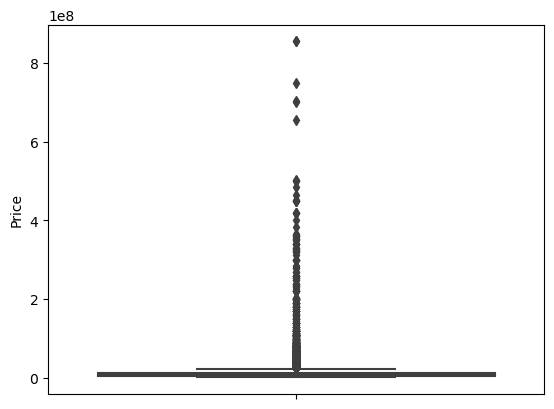

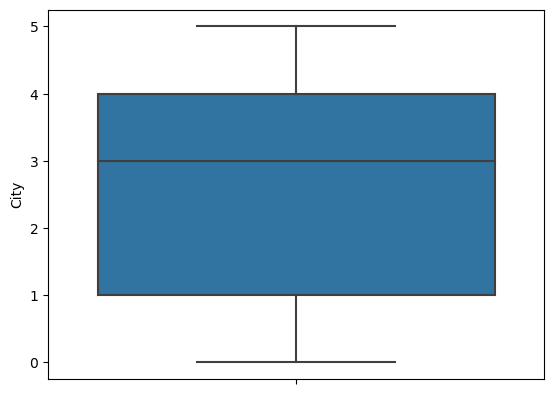

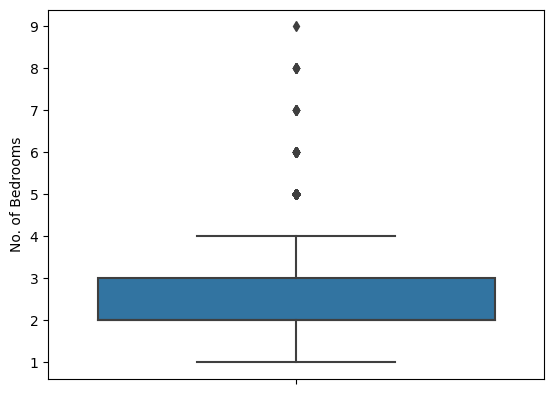

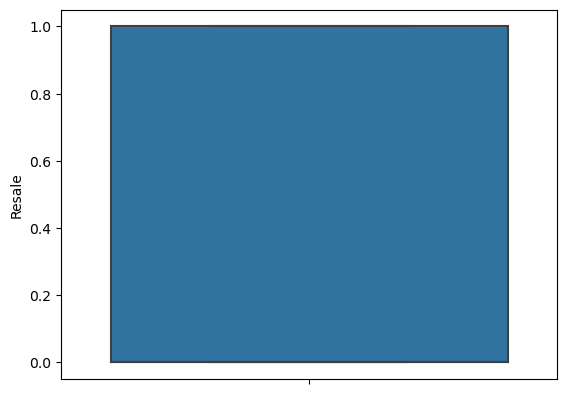

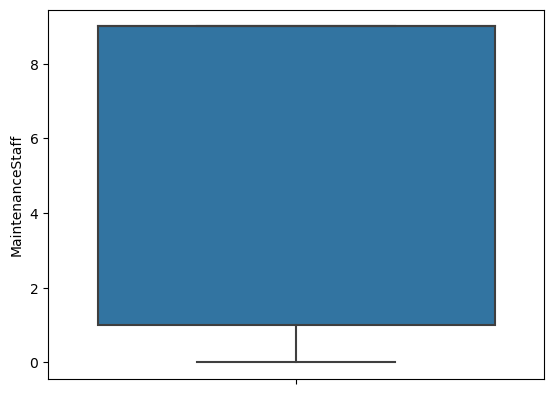

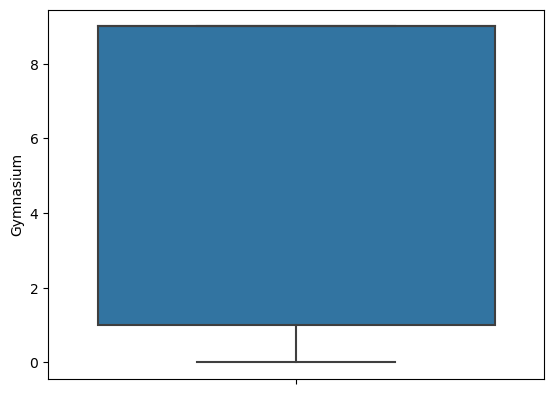

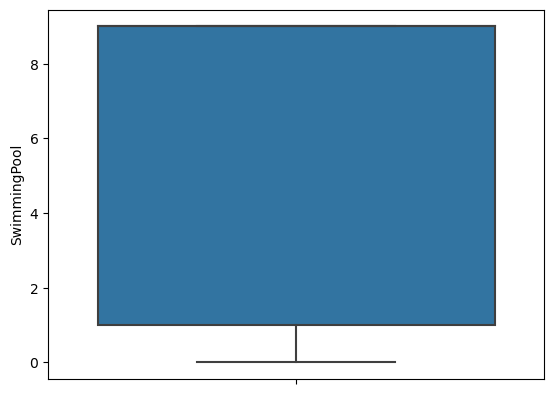

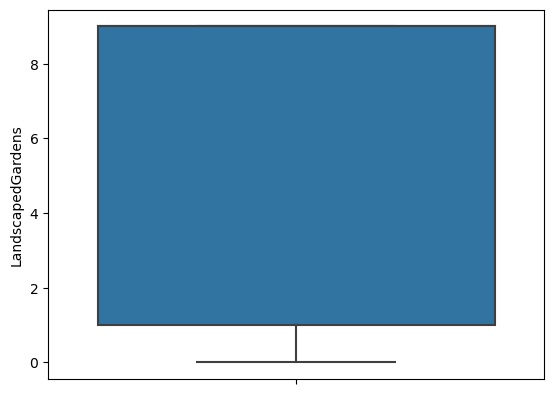

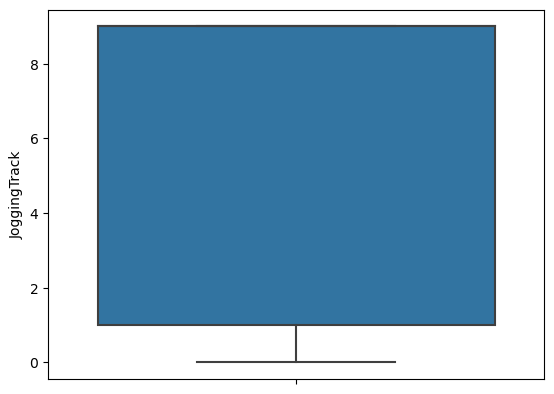

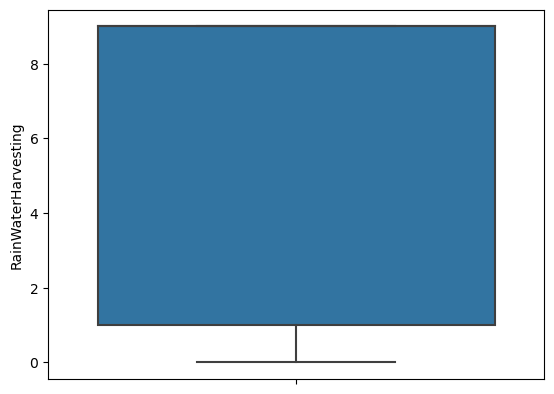

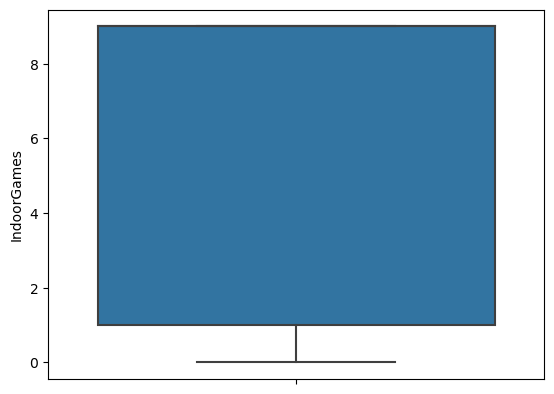

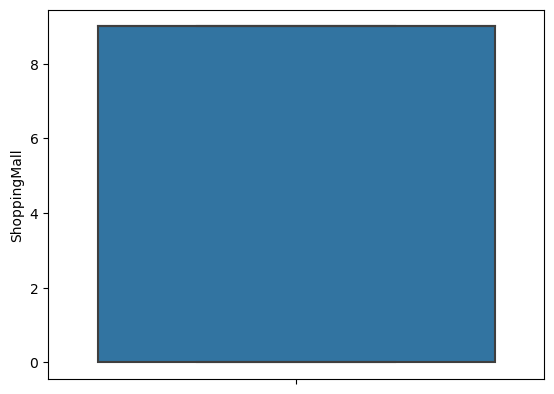

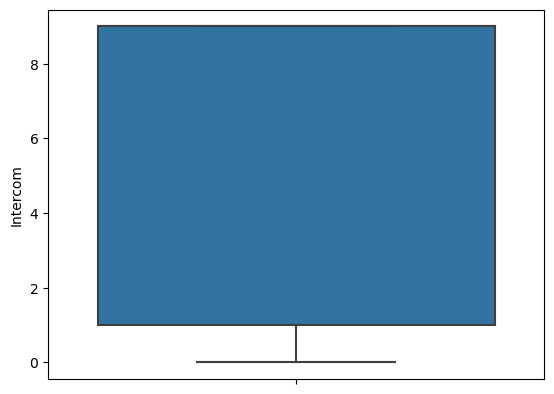

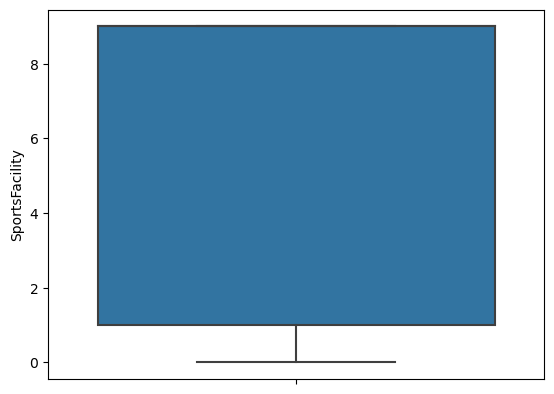

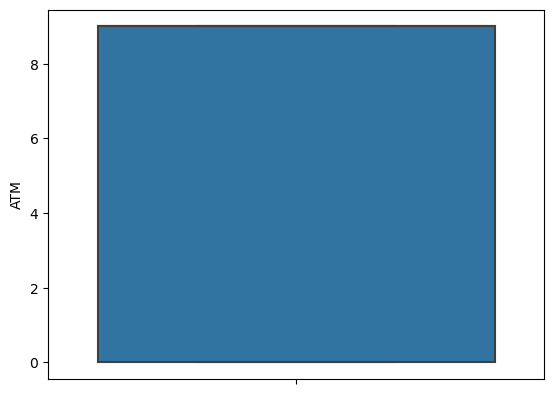

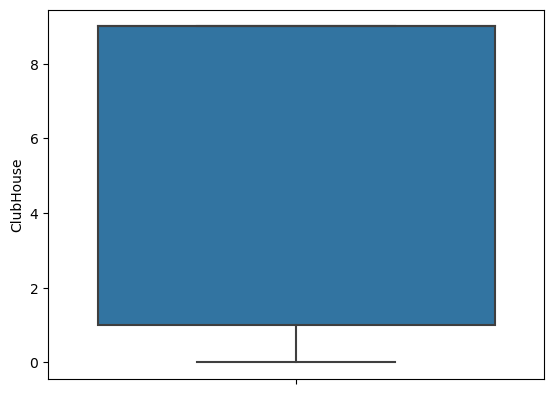

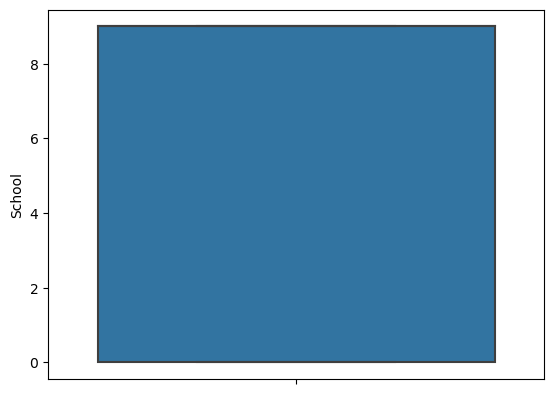

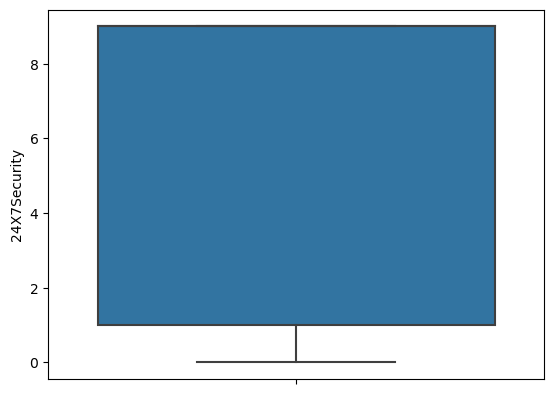

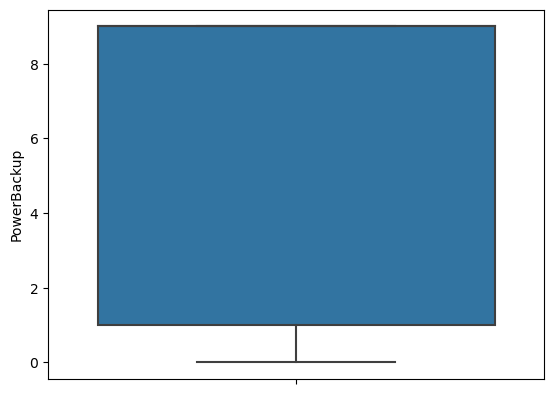

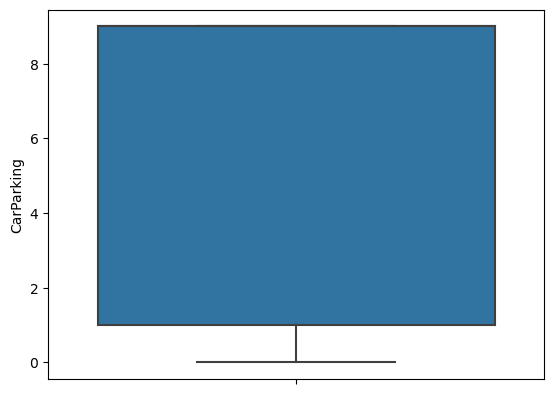

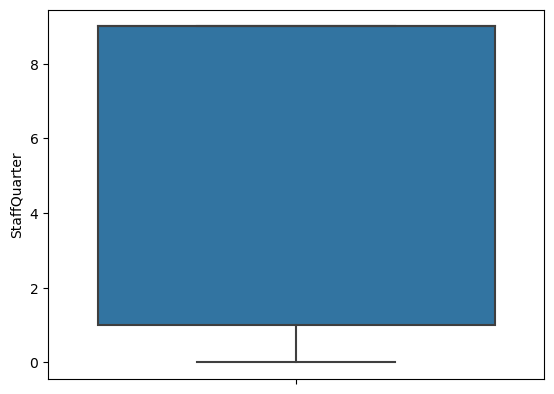

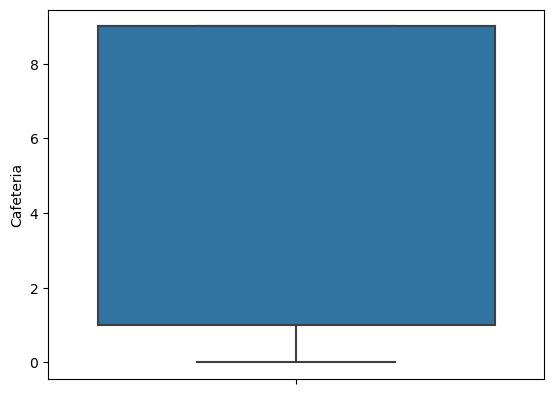

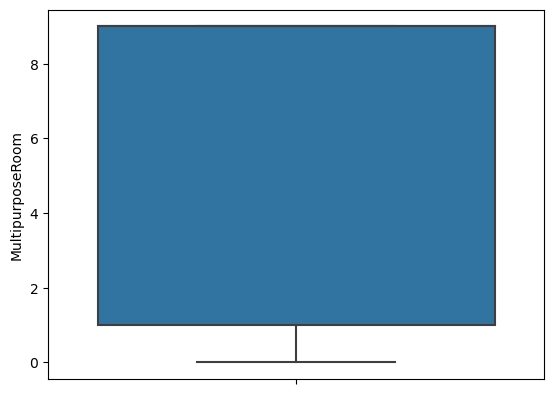

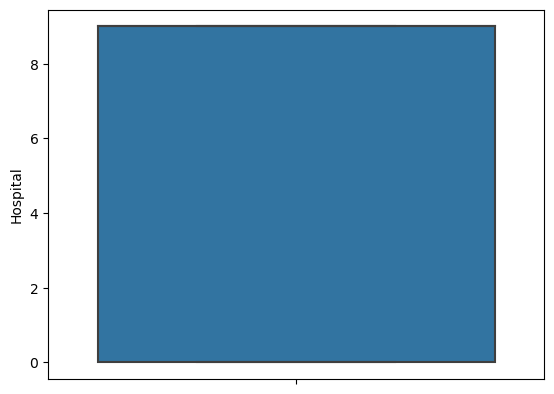

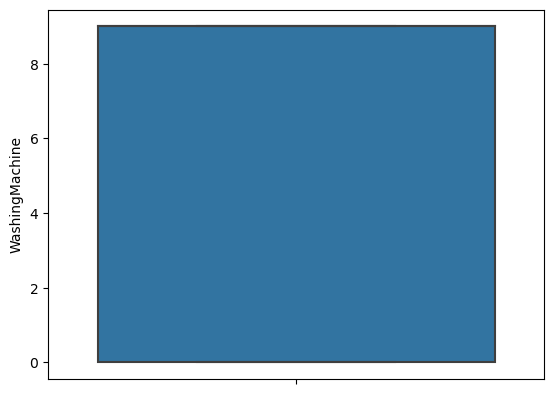

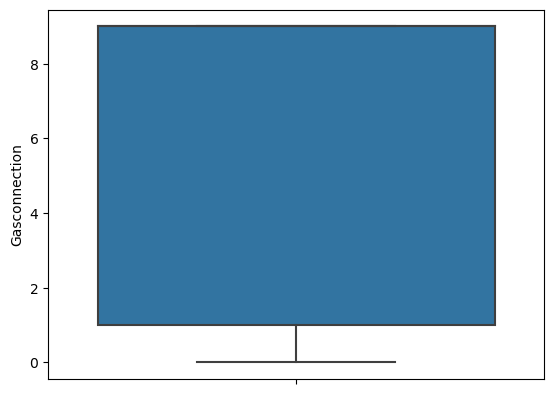

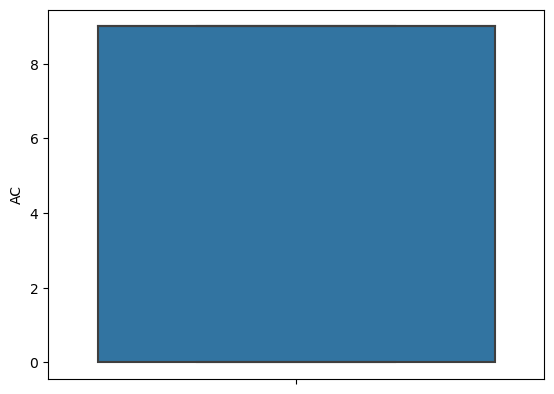

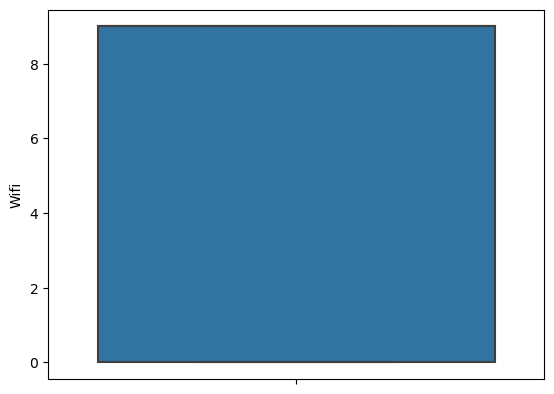

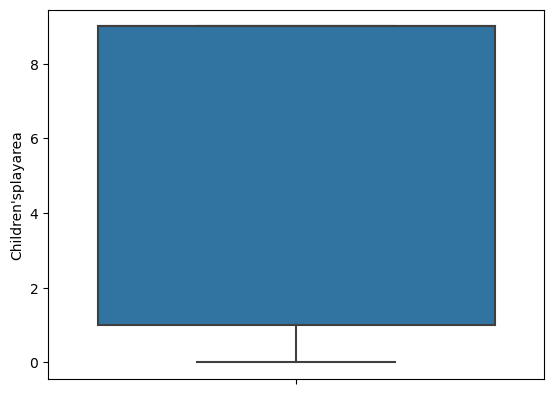

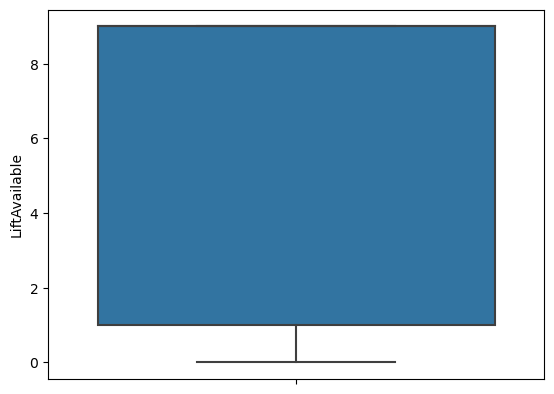

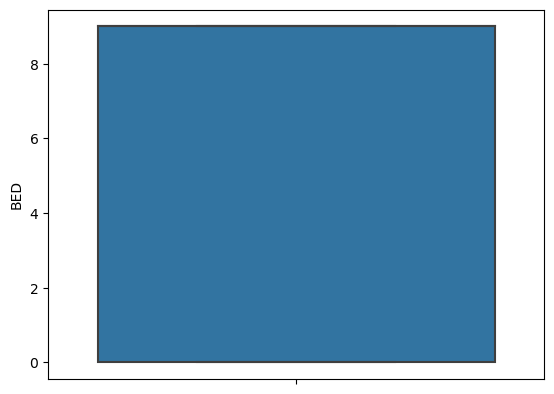

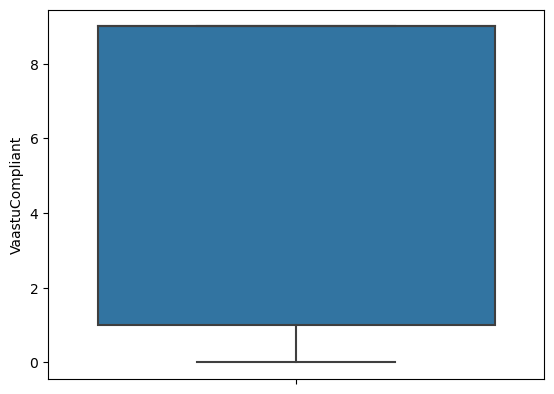

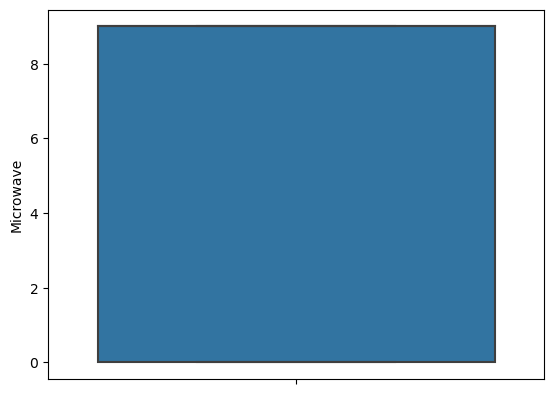

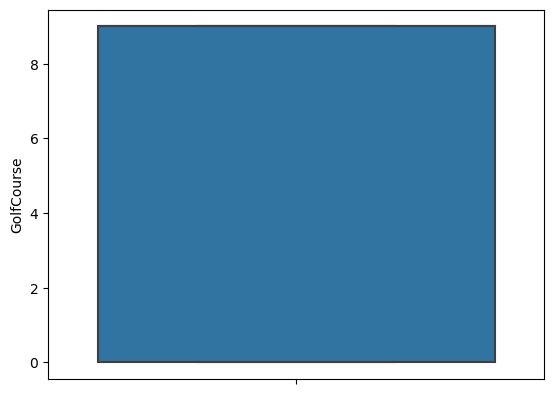

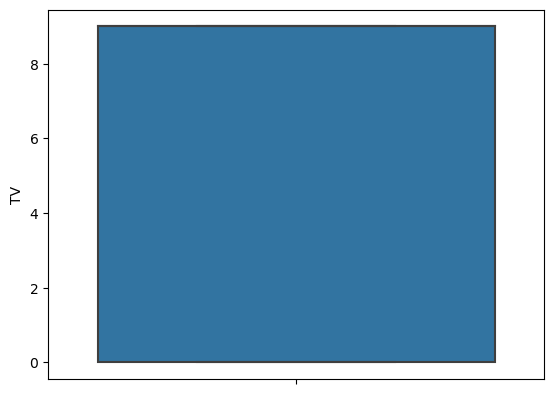

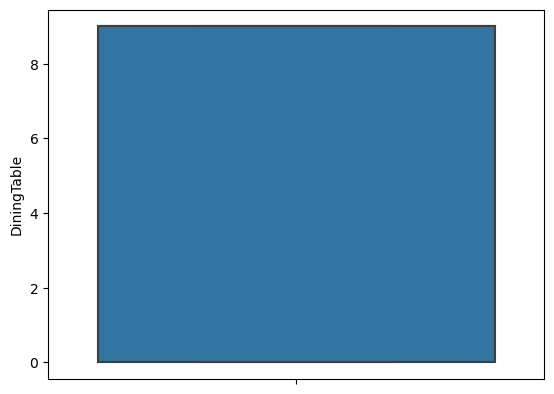

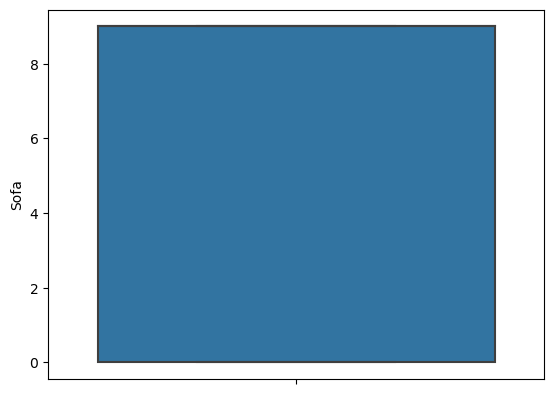

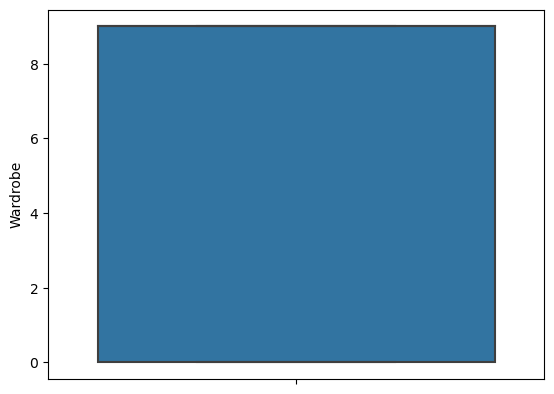

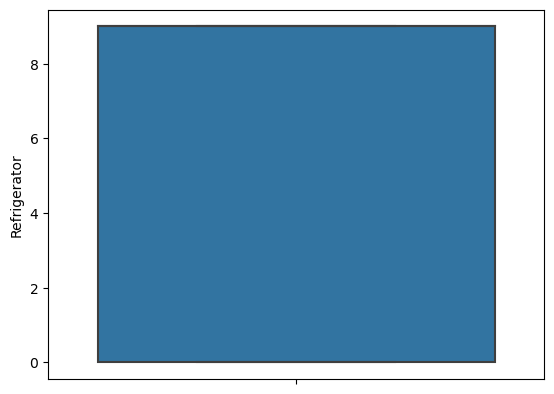

In [20]:
for i in data1.columns:
    sns.boxplot(y=data1[i])
    plt.show()

### Outlier Treatment

In [36]:
def outlier(col):
    Q3,Q1 = np.nanpercentile(col,[75,25])
    IQR = Q3-Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*IQR
    return UL,LL

In [37]:
for i in data1.columns:
    UL,LL = outlier(data1[i])
    data1[i] = np.where((data1[i]>UL)|(data1[i]<LL),np.nan,data1[i])

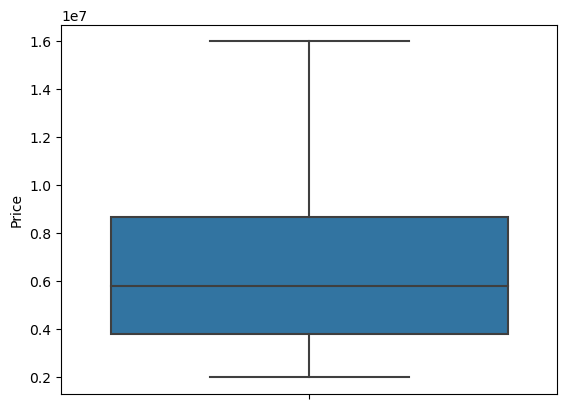

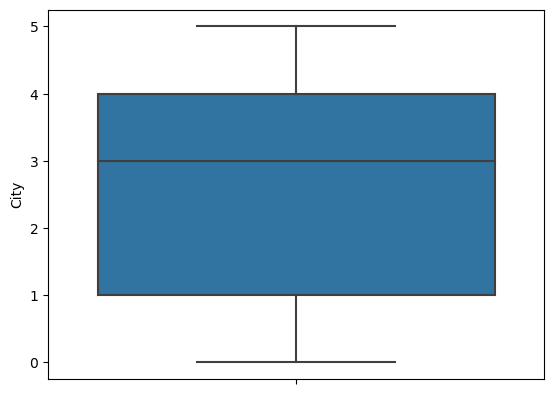

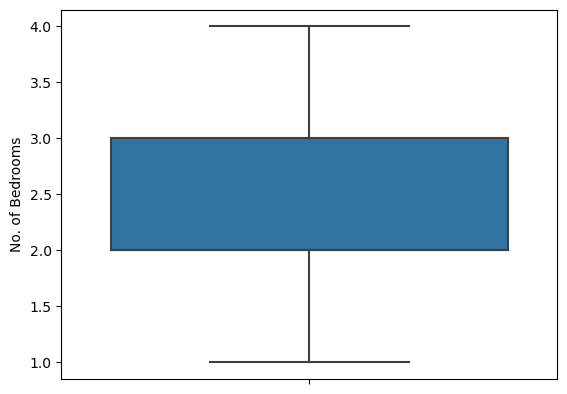

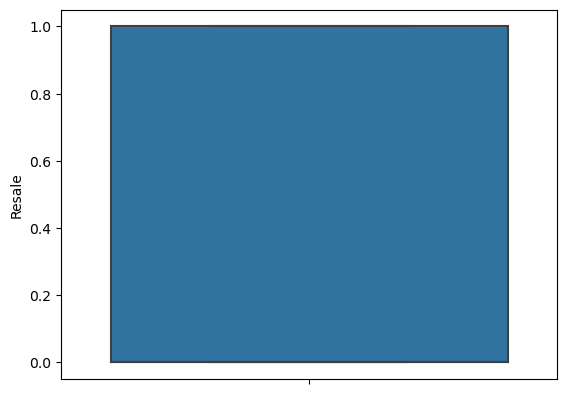

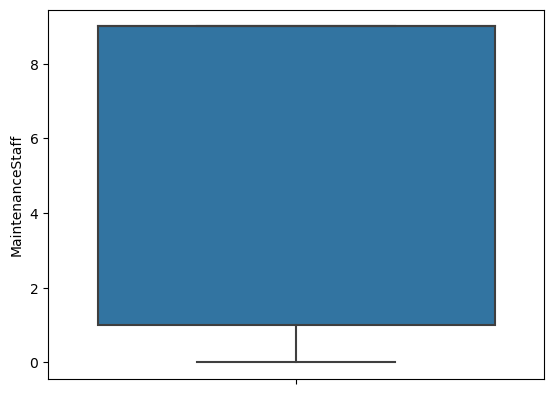

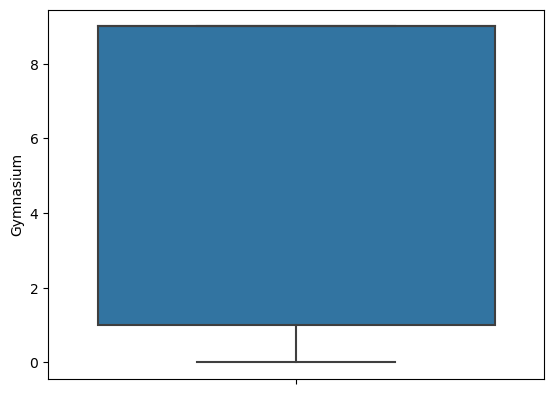

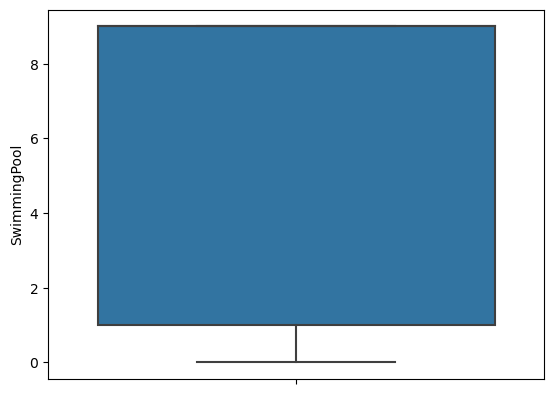

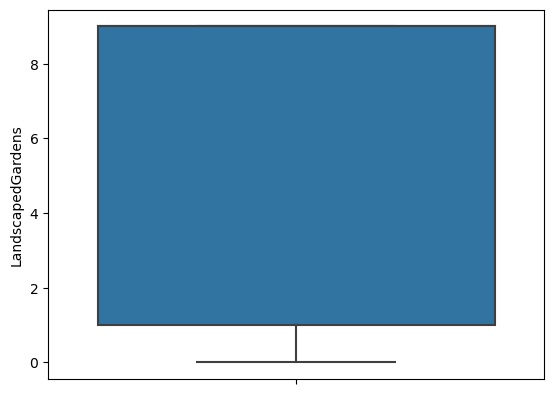

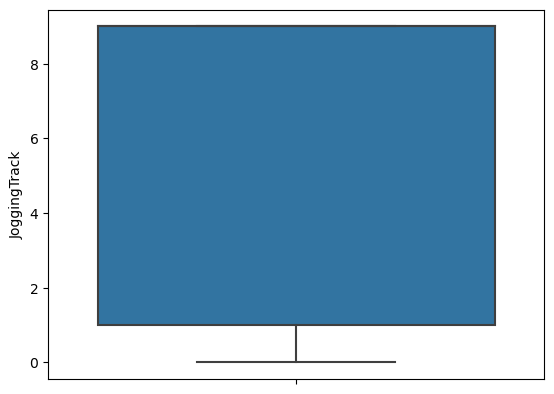

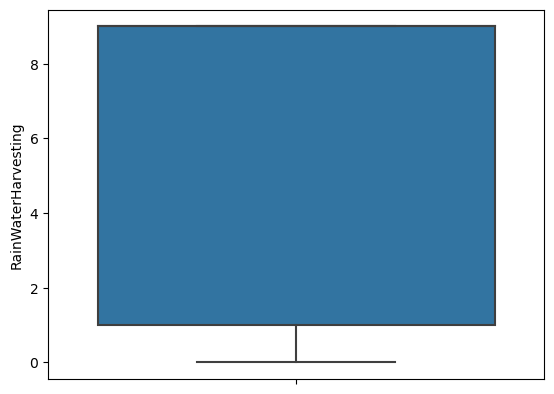

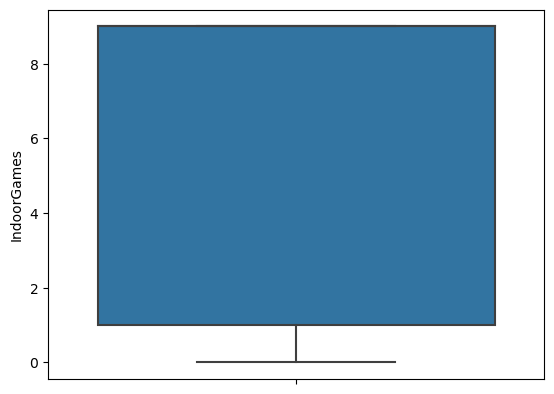

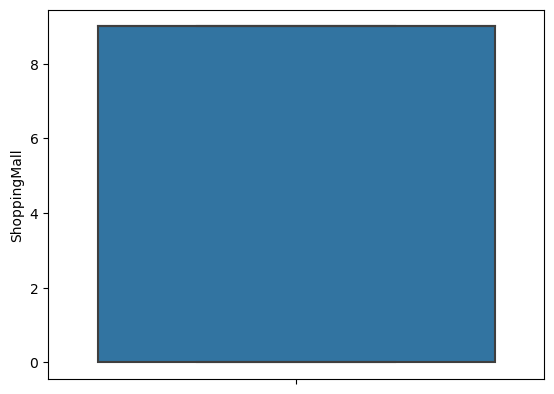

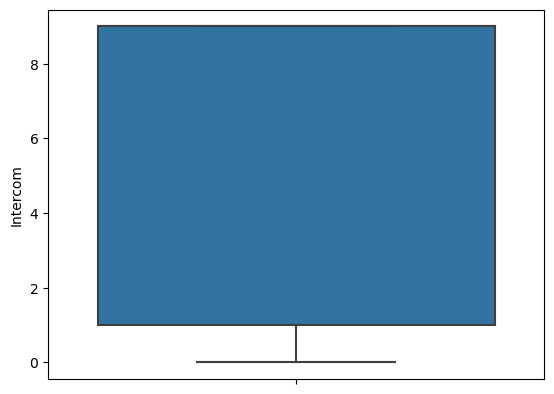

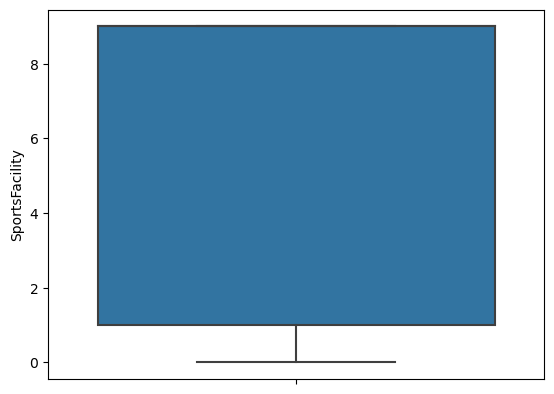

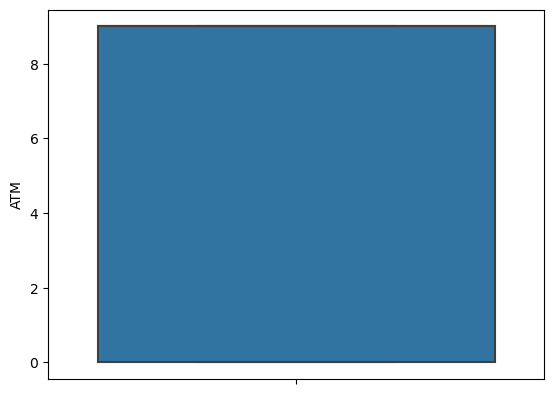

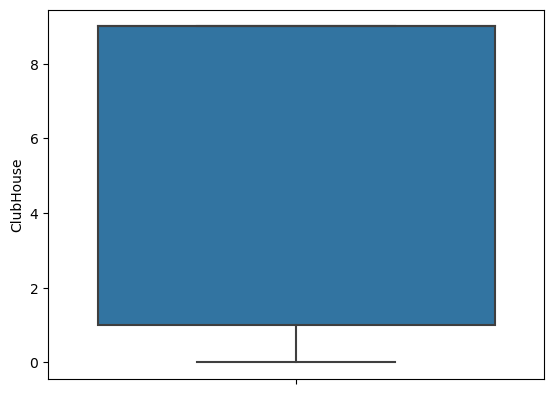

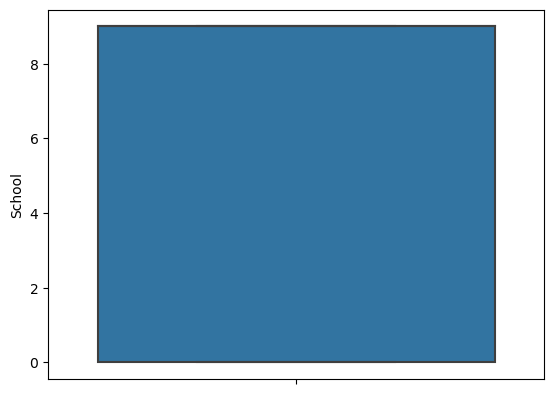

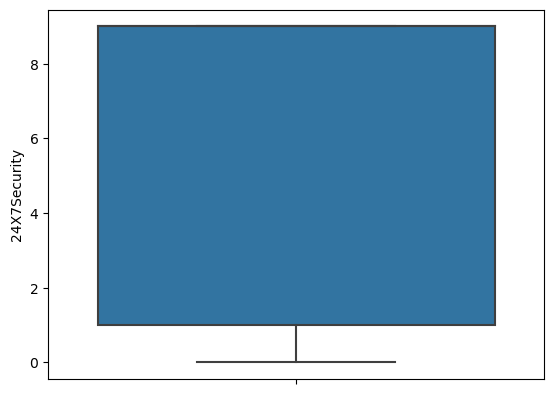

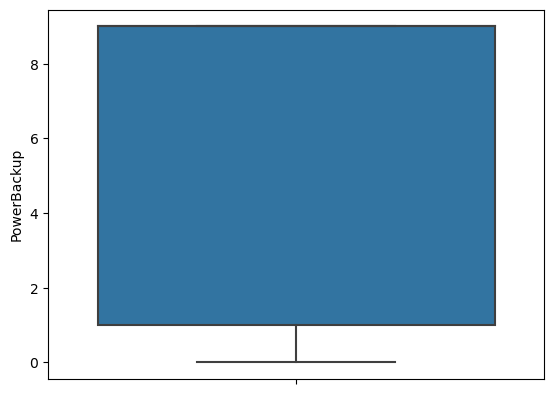

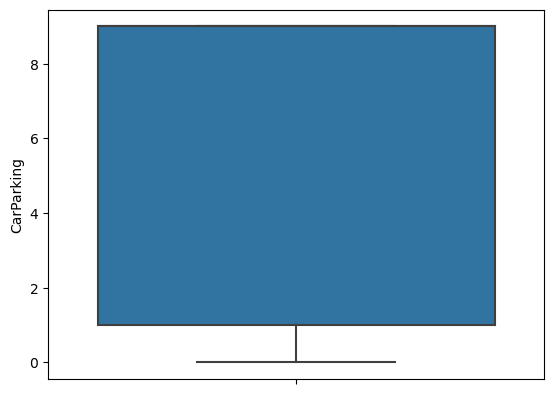

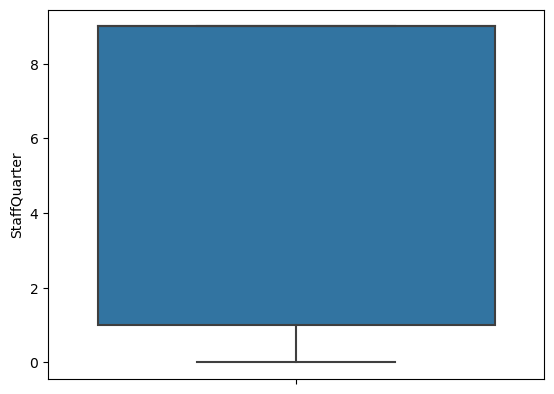

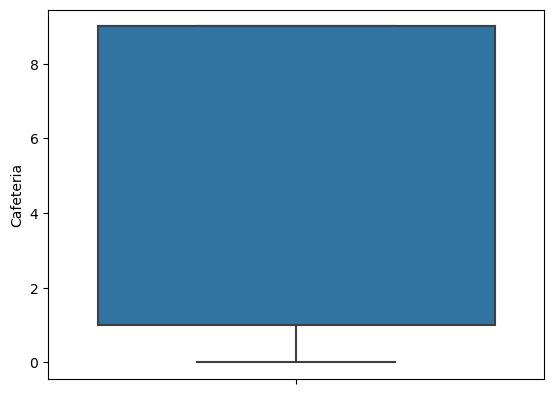

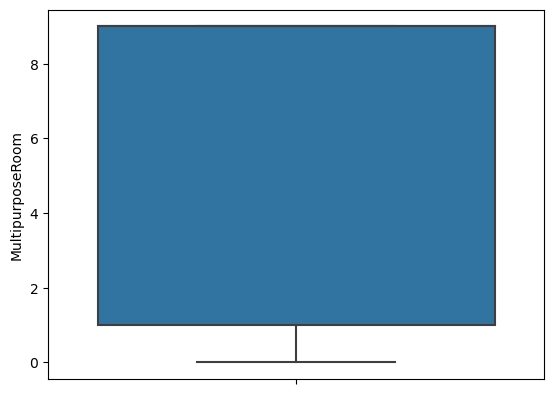

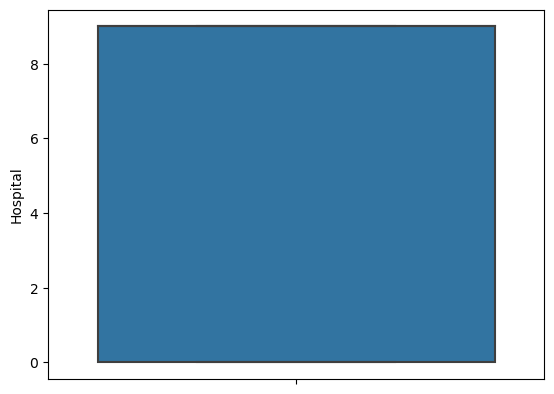

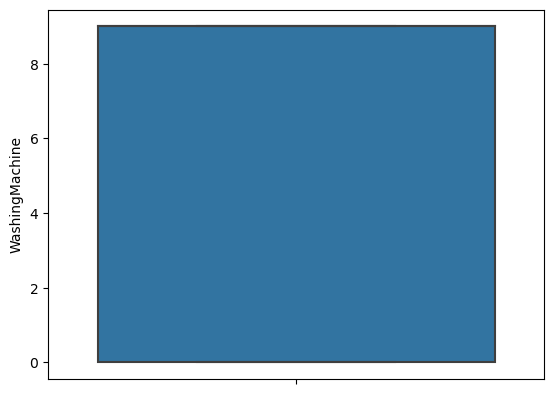

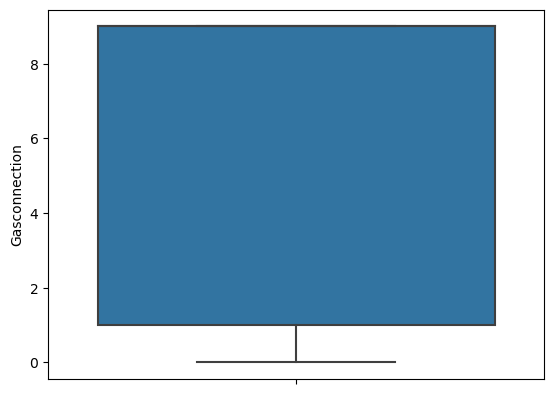

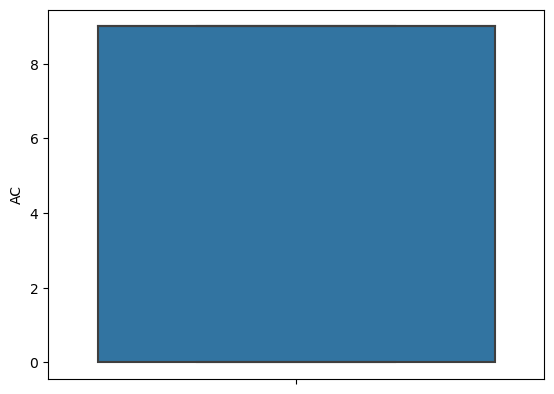

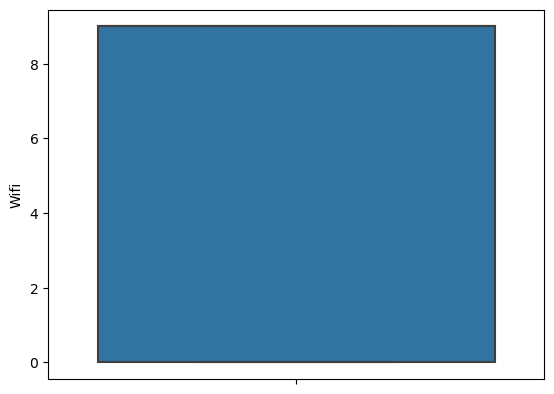

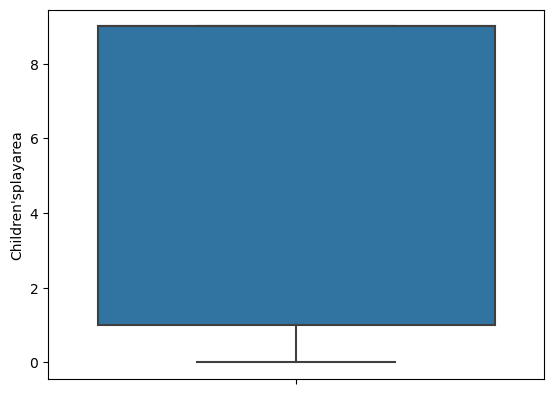

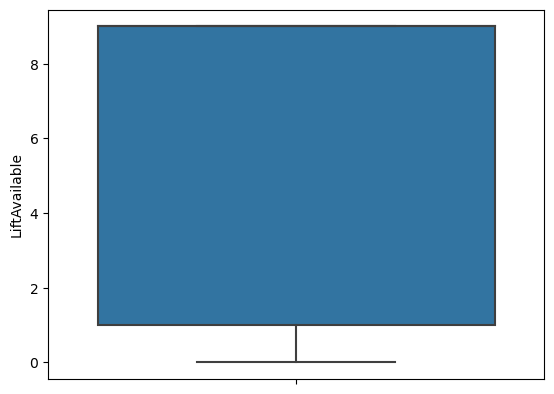

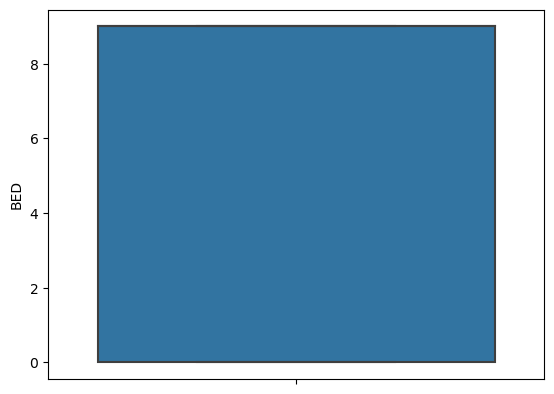

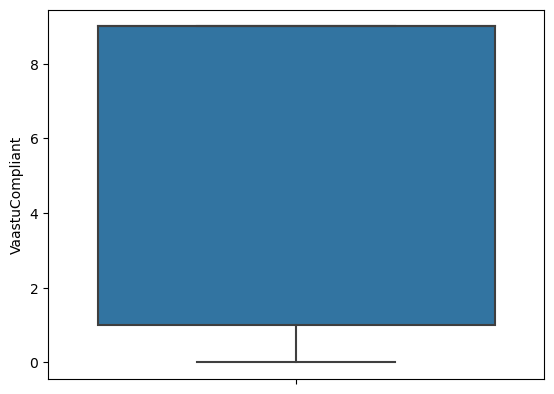

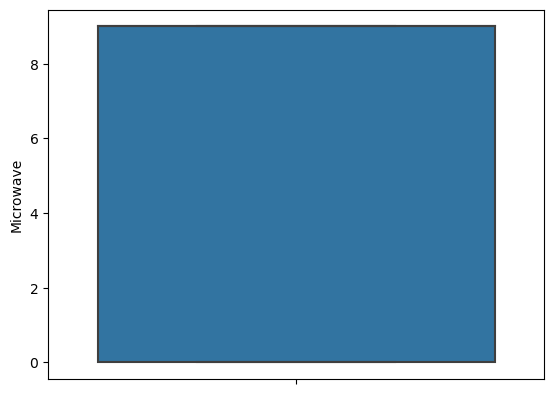

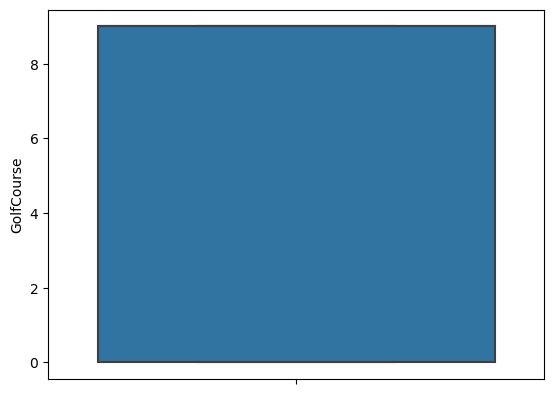

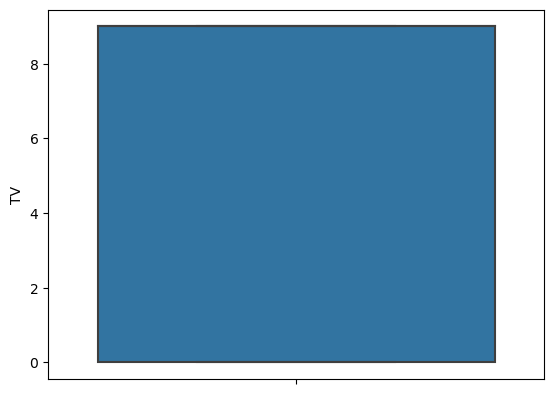

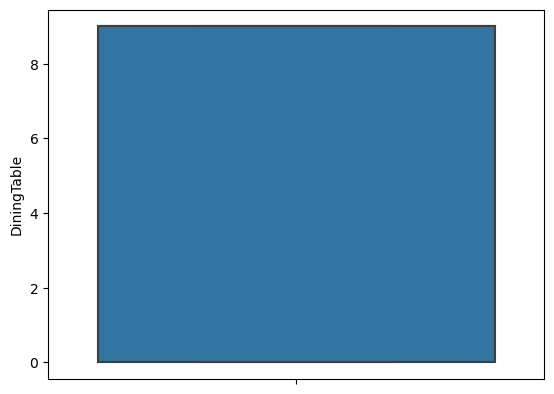

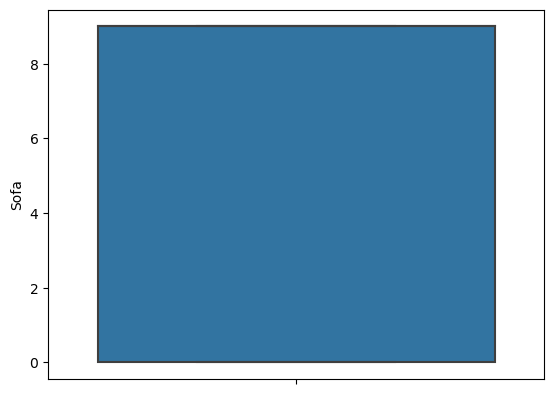

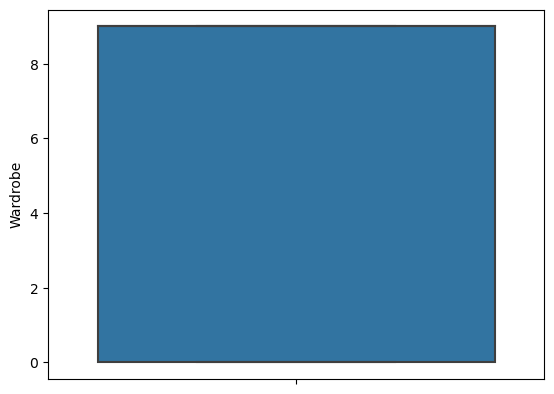

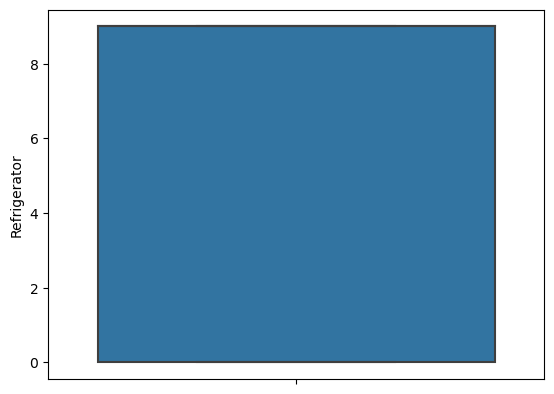

In [38]:
for i in data1.columns:
    sns.boxplot(y=data1[i])
    plt.show()

In [39]:
data1.isnull().sum()

Price                  4952
City                      0
No. of Bedrooms         249
Resale                    0
MaintenanceStaff          0
Gymnasium                 0
SwimmingPool              0
LandscapedGardens         0
JoggingTrack              0
RainWaterHarvesting       0
IndoorGames               0
ShoppingMall              0
Intercom                  0
SportsFacility            0
ATM                       0
ClubHouse                 0
School                    0
24X7Security              0
PowerBackup               0
CarParking                0
StaffQuarter              0
Cafeteria                 0
MultipurposeRoom          0
Hospital                  0
WashingMachine            0
Gasconnection             0
AC                        0
Wifi                      0
Children'splayarea        0
LiftAvailable             0
BED                       0
VaastuCompliant           0
Microwave                 0
GolfCourse                0
TV                        0
DiningTable         

In [40]:
data1.dropna(inplace=True)

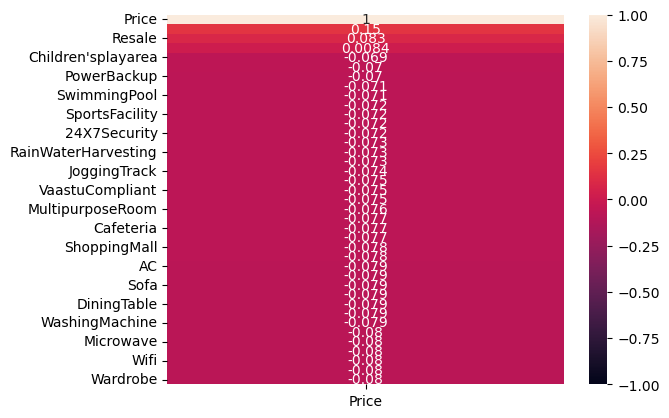

In [41]:
sns.heatmap(data1.corr()[["Price"]].sort_values(by="Price",ascending=False),vmax=1,vmin=-1,annot=True)
plt.show()

In [42]:
x= data1.iloc[:,1:].values
y= data1.iloc[:,0].values

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

#### Feature selection

In [44]:
fs = SelectKBest(score_func=f_regression,k='all')

In [45]:
fs.fit(x_train,y_train)

SelectKBest(k='all', score_func=<function f_regression at 0x000001F008F9A0E0>)

In [46]:
for i in range(len(fs.scores_)):
    print("Feature is :{} and score :{}".format(i,fs.scores_[i]))

Feature is :0 and score :2.0610802341621257
Feature is :1 and score :414.08892156791865
Feature is :2 and score :136.51814953496617
Feature is :3 and score :114.12338603808537
Feature is :4 and score :95.2319031059208
Feature is :5 and score :97.45545314576151
Feature is :6 and score :101.24043796252603
Feature is :7 and score :103.90243546617225
Feature is :8 and score :101.1558548802953
Feature is :9 and score :106.87421810619595
Feature is :10 and score :116.44165649901598
Feature is :11 and score :98.7858981422889
Feature is :12 and score :98.63944439842345
Feature is :13 and score :116.25256546191692
Feature is :14 and score :93.42009170638137
Feature is :15 and score :122.30713141163216
Feature is :16 and score :100.40948955105834
Feature is :17 and score :95.16855554891735
Feature is :18 and score :103.12012739769206
Feature is :19 and score :112.94670586407564
Feature is :20 and score :114.42050659115824
Feature is :21 and score :110.58515283854433
Feature is :22 and score :121

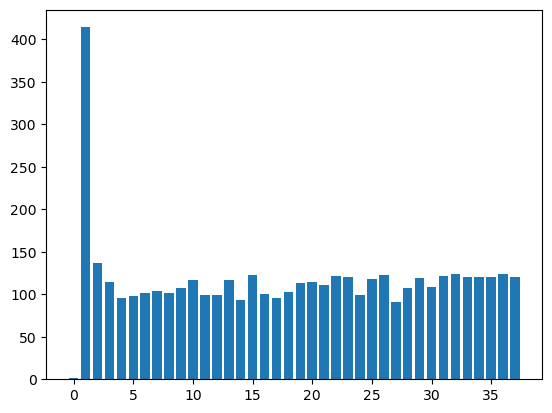

In [47]:
plt.bar([i for i in range(len(fs.scores_))],fs.scores_)
plt.show()

In [48]:
models = {"LinearRegression":LinearRegression(),
          "Lasso":Lasso(),
          "Ridge":Ridge(),
          "RandomForestRegressor":RandomForestRegressor(),
          "AdaBoostRegressor":AdaBoostRegressor(),
          "GradientBoostingRegressor":GradientBoostingRegressor(),
          "DecisionTreeRegressor":DecisionTreeRegressor(),
          "LinearSVR":LinearSVR()
    
}

In [49]:
for name,model in models.items():
    scores = cross_val_score(model,x,y,scoring="neg_mean_squared_error",cv=10,n_jobs=1)
    print("Cross validation model:{}".format(name))
    rmse = np.sqrt(-scores)
    avg_rmse = np.mean(rmse)
    print("Avg rmse:{}".format(avg_rmse))
    print("*"*100)

Cross validation model:LinearRegression
Avg rmse:3481648.276357419
****************************************************************************************************
Cross validation model:Lasso
Avg rmse:3480803.9752802015
****************************************************************************************************
Cross validation model:Ridge
Avg rmse:3480936.1089347205
****************************************************************************************************
Cross validation model:RandomForestRegressor
Avg rmse:3229525.1578302123
****************************************************************************************************
Cross validation model:AdaBoostRegressor
Avg rmse:3360169.565658002
****************************************************************************************************
Cross validation model:GradientBoostingRegressor
Avg rmse:3173107.8418366998
************************************************************************************************

In [50]:
Model = GradientBoostingRegressor()

In [51]:
GBR = Model.fit(x_train,y_train)

In [52]:
y_pred = GBR.predict(x_test)

In [53]:
score = r2_score(y_test,y_pred)
print("Score:{}".format(score))

Score:0.23932199500044227


In [54]:
GBR.score(x_test,y_test)

0.23932199500044227

In [55]:
GBR.score(x_train,y_train)

0.2294432809956295

In [56]:
np.set_printoptions(suppress=True)

In [57]:
Output = pd.DataFrame(zip(y_test,y_pred),columns=["Actual","Prediction"])
pd.options.display.float_format='{:,.5f}'.format
Output.head()

,Actual,Prediction
0,"3,158,000.00000","5,681,887.98017"
1,"5,800,000.00000","5,622,633.26121"
2,"3,599,000.00000","6,836,285.94943"
3,"5,500,000.00000","11,170,879.44592"
4,"8,520,000.00000","6,745,153.89323"


In [58]:
Output.dtypes

Actual        float64
Prediction    float64
dtype: object

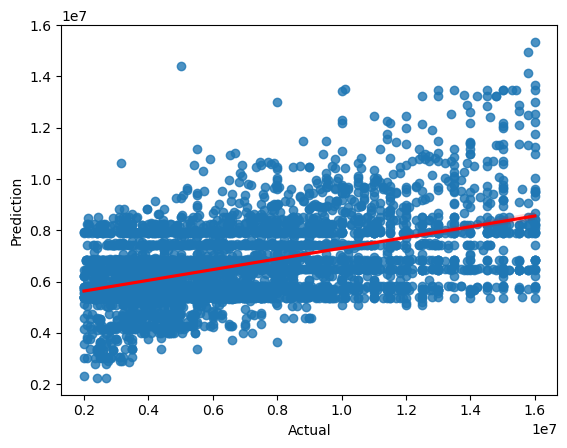

In [59]:
sns.regplot(data=Output,x="Actual",y="Prediction",line_kws=dict(color='r'))
plt.show()